# IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# Cargamos desde nuestro disco los/el dataframe que iremos a analizar

from google.colab import files
uploaded = files.upload()

Saving Marketing_data.csv to Marketing_data.csv


In [ ]:
# Creamos el objeto DataFrame con pandas

df = pd.read_csv('Marketing_data.csv')

Mostramos la columna y el tipo de dato de c/u:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# LIMPIEZA DEL DATASET

## Tratamiento de valores nulos.

In [ ]:
# Buscando columnas con datos faltantes
columns_w_missing_data = df.columns[df.isnull().any()].tolist()
columns_w_missing_data

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

Vamos a rellenar los datos faltantes en CREDIT_LIMIT y MINIMUM_PAYMENTS con el promedio del campo MINIMUM_PAYMENT y CREDIT_LIMIT respec. Este aprouch se llama imputation.

In [ ]:

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy='mean')

imputer_missing_val_cols = pd.DataFrame(my_imputer.fit_transform(df[["MINIMUM_PAYMENTS", "CREDIT_LIMIT"]]))

imputer_missing_val_cols.columns = df[["MINIMUM_PAYMENTS", "CREDIT_LIMIT"]].columns

In [ ]:
# Reemplazamos las columnas las cuales hemos aplicado el imputer

df_ = df.drop(["MINIMUM_PAYMENTS", "CREDIT_LIMIT"], axis=1).copy()
df_[imputer_missing_val_cols.columns] = imputer_missing_val_cols

In [ ]:
# Checkeamos

df_.columns[df_.isnull().any()].tolist()

[]

In [ ]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 

df_.duplicated().sum()

0

# VISUALIZACIÓN DEL DATASET

## Primer acercamiento a los datos

Empezamos analizando la media, mediana, cuartiles, desviación estándar, máximos y mínimos de cada columna.

Vemos que:

* El balance medio es $1564.

* La frecuencia del balance se actualiza bastante a menudo, en promedio 0.9 aprox.

* El promedio de las compras es $1000.

* El promedio de la frecuencia de las compras está cerca de 0.5.

* El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo.

* El promedio del límite de crédito es 4500 aprox.

* El porcentaje de pago completo es 15%.

* Los clientes llevan de promedio en el servicio 11 años.

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Histogramas con estimación de densidad kernel

In [ ]:
n = len(df_)
m = len(df_.columns)

print(f"Tenemos una cantidad de {n} filas")
print(f"Tenemos una cantidad de {m} columnas")

Tenemos una cantidad de 8950 filas
Tenemos una cantidad de 18 columnas


A partir de los gráficos podemos notar las siguientes observaciones:

* El campo 'Balance_Frequency' nos indica que para muchos usuarios, este se actualiza muy frecuentemente ~1.

* Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes.

* Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' es más probable que la gran mayoría de usuarios no paguen todo de golpe ni a plazos.

* Gracias al gráfico de la columna 'PRC_FULL_PAYMENT' podemos concluir que no es muy probable que los clientes paguen su deuda al completo.

* Gracias al gráfico de la columna 'TENURE' concluimos que la mayoría de clientes llevan más de 11 años usando el servicio.

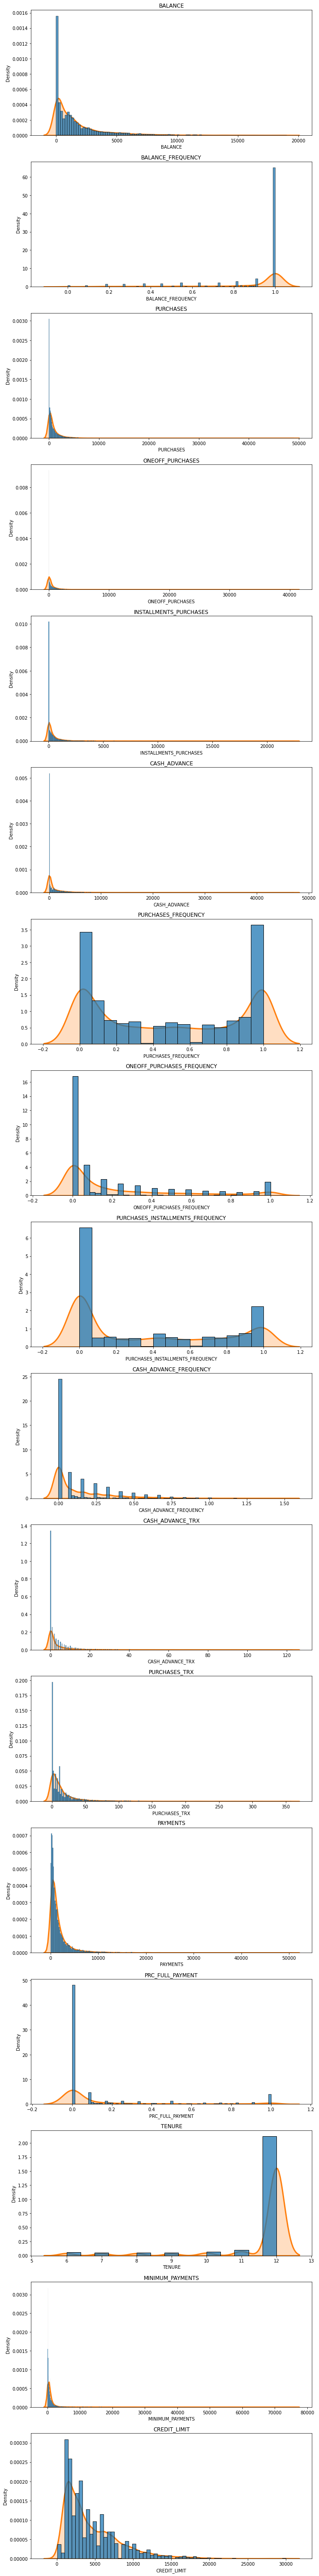

In [ ]:
# Dropeamos la columan cust_id ya que no aporta informacion para el sig analisis

df_2 = df_.drop("CUST_ID", axis=1)

fig, axs = plt.subplots(17,1,figsize=(10,80))

# restamos 1 pues no contemplamos la columna cust_id ya que es de tipo obj y ademas no es necesario plotearla ya que no aporta informacion para analisis

for i in range(m-1):
  sns.histplot(df_2[df_2.columns[i]], stat="density", ax=axs[i]).set_title(df_2.columns[i])
  sns.kdeplot(df_2[df_2.columns[i]],lw=3, fill=True, ax=axs[i])

plt.tight_layout()

## Heatmap

Podemos observar algunas de las siguientes correlaciones:

* 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments.

* 'PURCHASES_FREQUENCY' posee una correlación muy elevada con 'PURCHASES_INSTALLMENT_FREQUENCY'

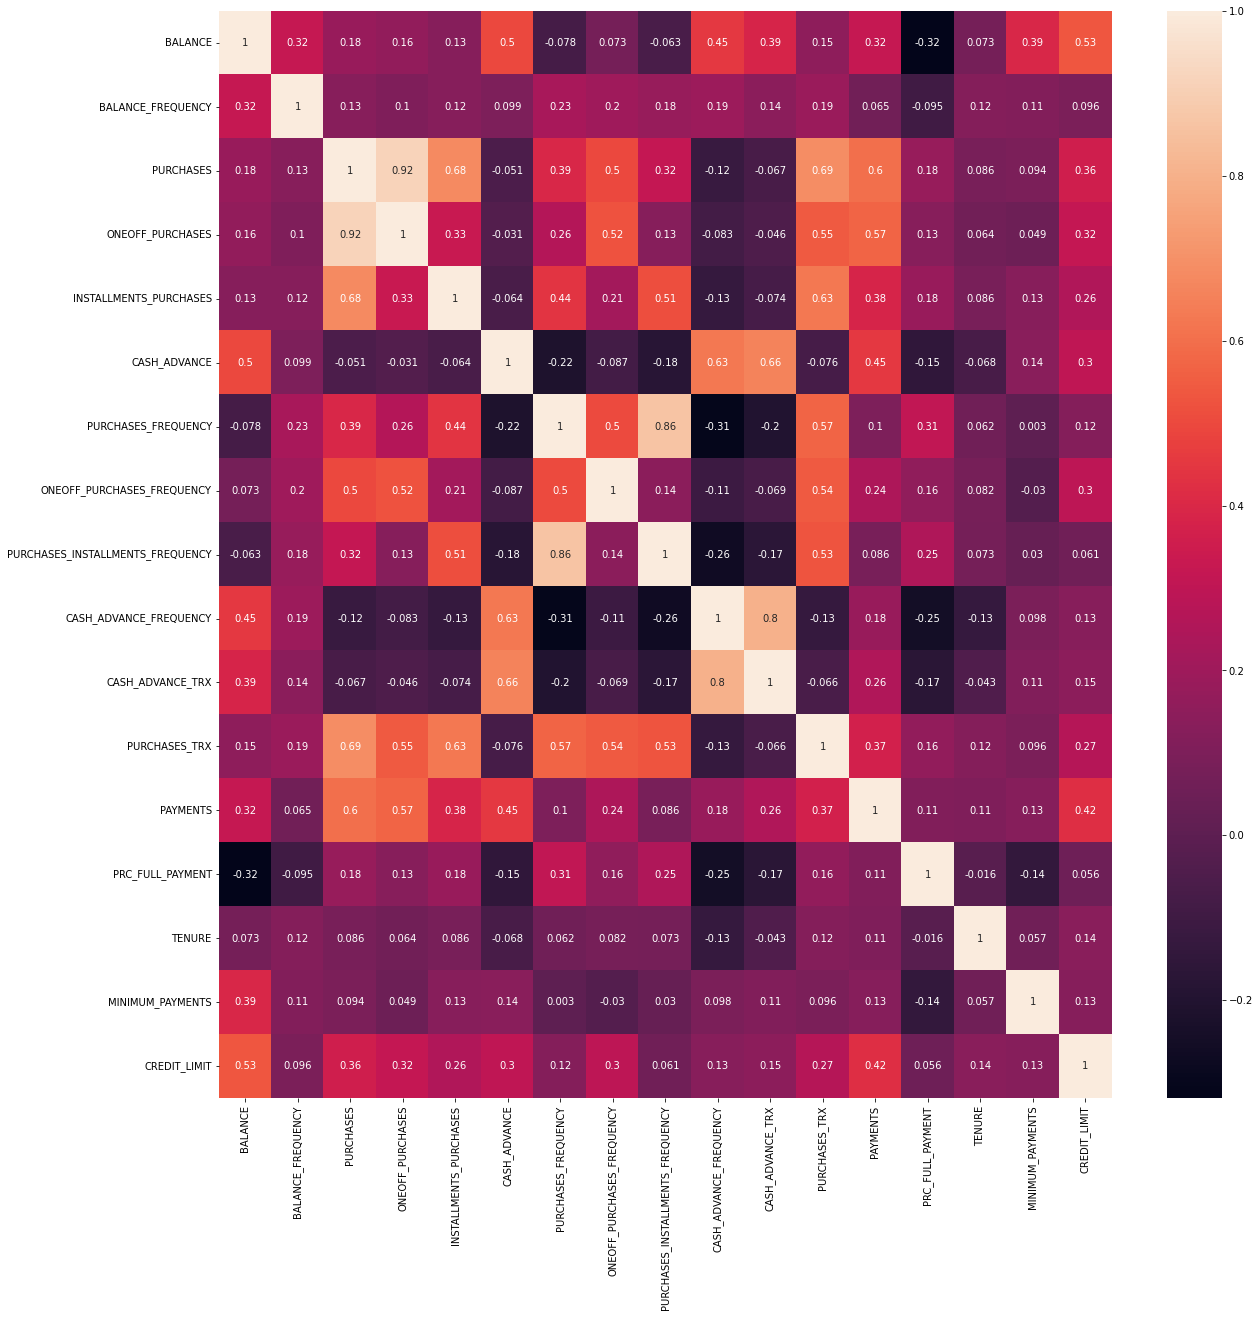

In [ ]:
corr = df_.corr()

f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)

# ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DEL CODO

In [ ]:
# Empecemos por escalar primero el dataset
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_2)

In [ ]:
scores_1 = []
range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)

  cluster_labels = kmeans.fit_predict(df_scaled)  
  scores_1.append(kmeans.inertia_) # inertia == WCSS

Graficamos los WCSS

Con el gráfico podemos ver que con 4 clusters es donde se forma el "codo" de la curva.
Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
Elegimos un número de clusters igual a 4-8.

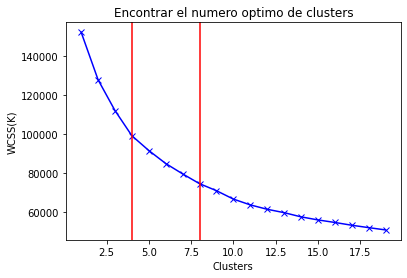

In [ ]:
plt.plot(range_values, scores_1, color= "b", marker="x", linestyle="-")
plt.axvline( x=4, color="r")
plt.axvline( x=8, color="r")
plt.title("Encontrar el numero optimo de clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(K)")
plt.show()

# APLICAR EL MÉTODO DE K-MEANS

Declaramos el modelo y lo entrenamos con los datos escalados.

In [ ]:
kmeans = KMeans(4)
kmeans.fit(df_scaled)

labels = kmeans.labels_

In [ ]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[df_2.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS,CREDIT_LIMIT
0,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.138502,0.395041,0.057744,-0.091844,-0.077298
1,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.603821,-0.406367,-0.097146,0.490910,0.838968
2,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.262060,-0.258866,-0.052972,-0.119249,-0.334417
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.919096,0.454703,0.324140,0.477421,1.429882


Para entender mejor estos valores, vamos a aplicar la transformación inversa.

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns=[df_2.columns])
cluster_centers  

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS,CREDIT_LIMIT
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,1332.194205,0.269258,11.594595,650.167072,4213.207678
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,3481.145990,0.034859,11.387312,2008.251157,7546.957050
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,974.505090,0.078001,11.446429,586.301239,3277.703165
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,7288.739497,0.286707,11.951100,1976.815179,9696.943765


Concatenamos las etiquetas de los clusters con el dataset original.

In [ ]:
df_clusters = pd.concat([df_2, pd.DataFrame({"Cluster": labels})], axis=1)

Podemos hacer el siguiente análisis producto de los histogramas y la info previa de c/cluster:

* Primer cluster de Clientes: Estos son los clientes que pagan una menor cantidad de cargos por intereses, tienen cuidado con su dinero, este clúster posee el balance más bajo (894) y un anticipo en efectivo bajo tmb (210), con un porcentaje de pago completo del 27%.

* Segundo cluster de Clientes: Estos clientes usan tarjeta de crédito como préstamo (sector más lucrativo), poseen un saldo más alto (4602) y un anticipo en efectivo alto tmb (4520), tienen una baja frecuencia de compra y una alta frecuencia de anticipo en efectivo del 0.48, poseen tmb transacciones de anticipo en efectivo altas (14) y un bajo porcentaje de pago (3%).

* Tercer cluster de Clientes: Tienen un límite de crédito alto $ 9696 y porcentaje más alto de pago completo, estos son un objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto.

* Cuarto cluster de Clientes: estos son clientes con baja antigüedad (7 años), poseen un saldo bajo.

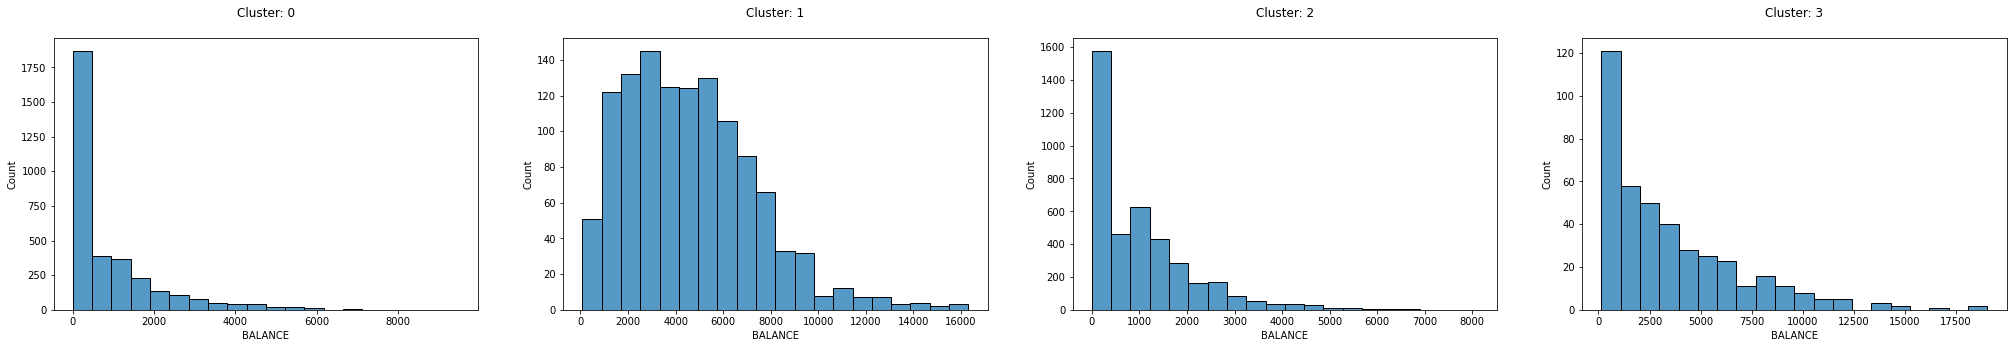

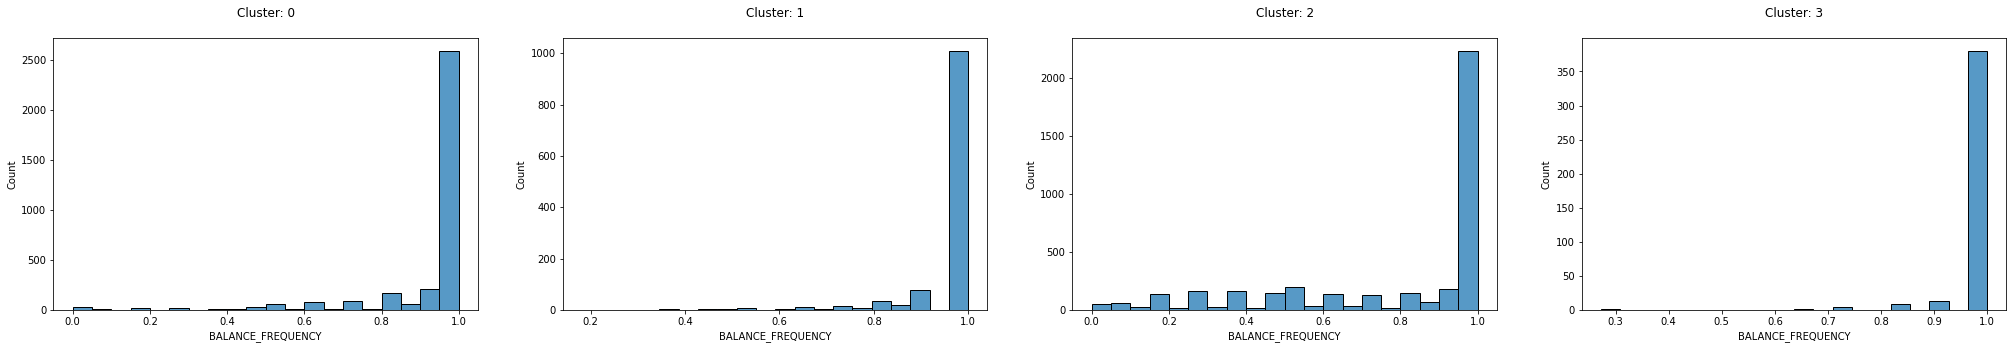

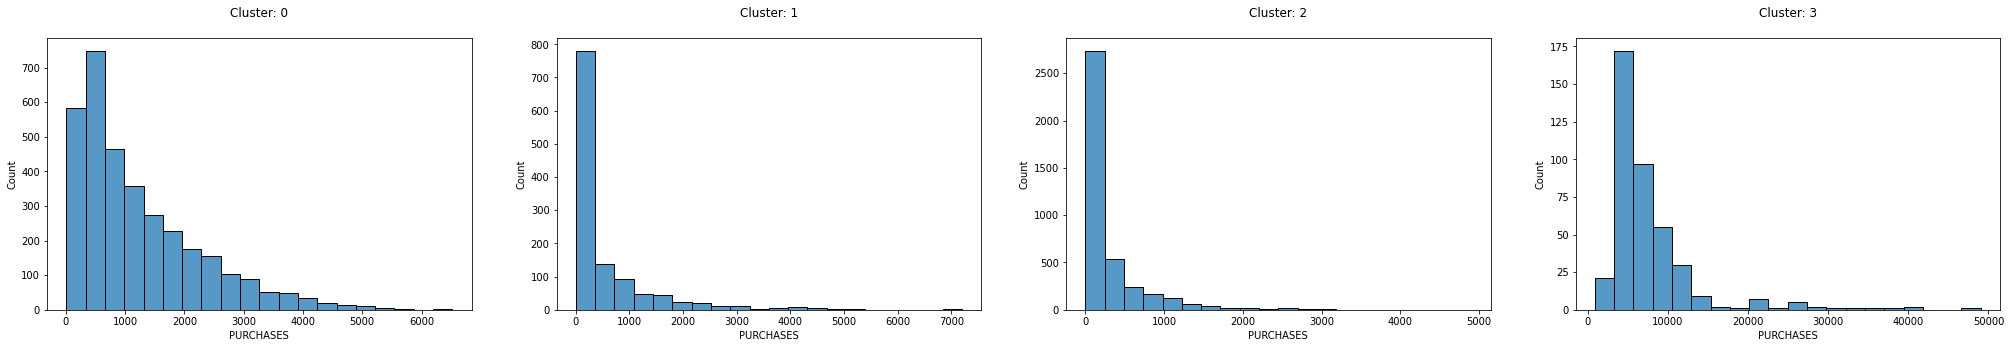

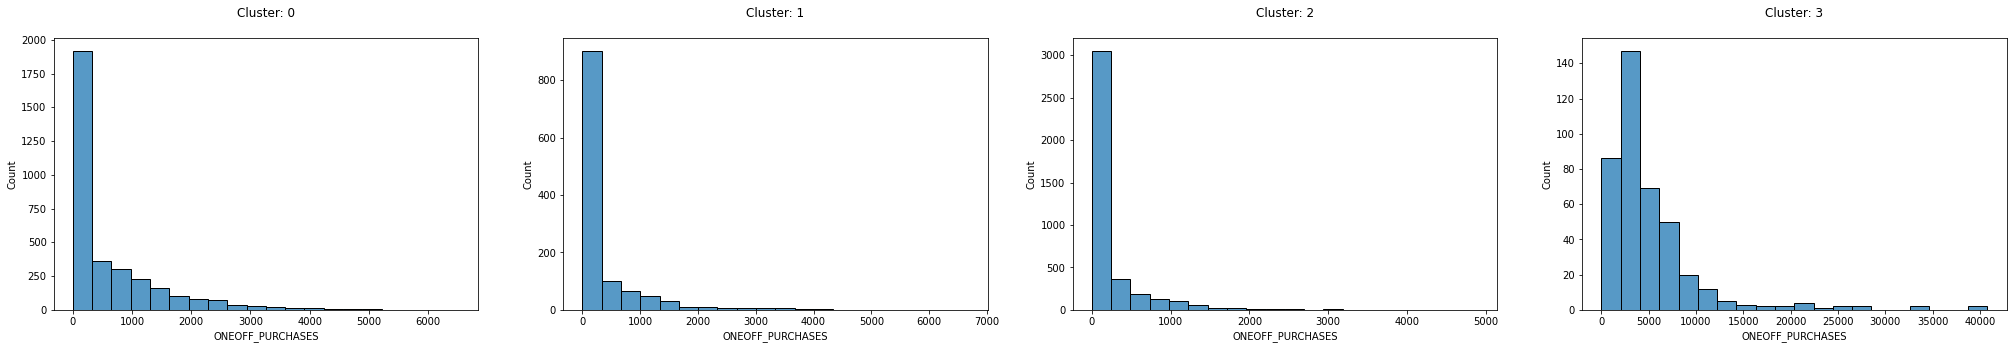

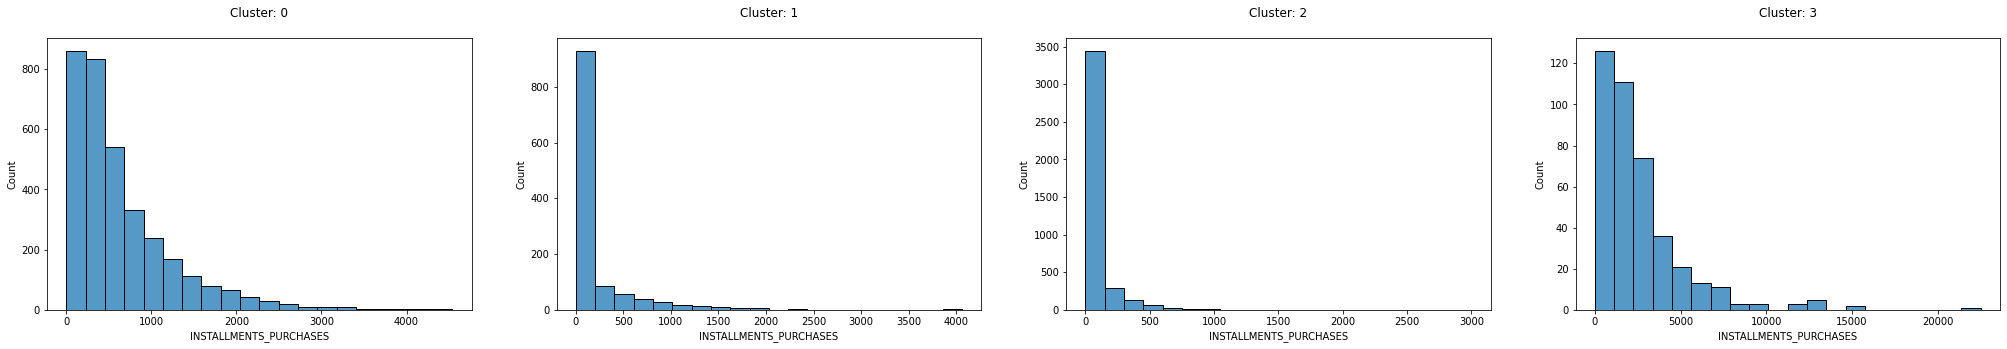

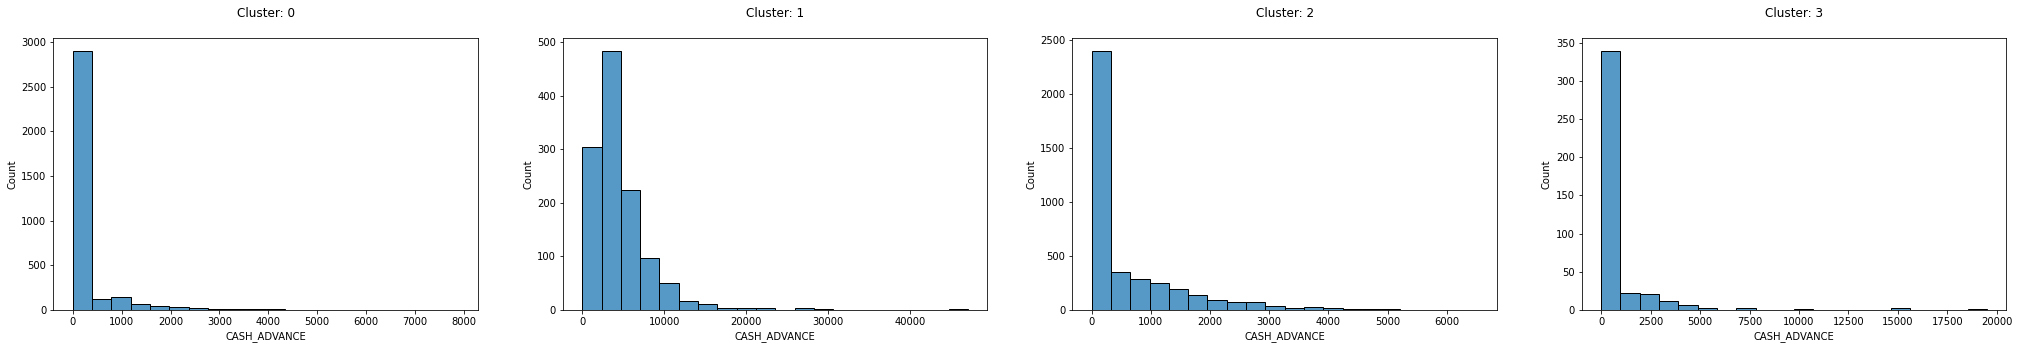

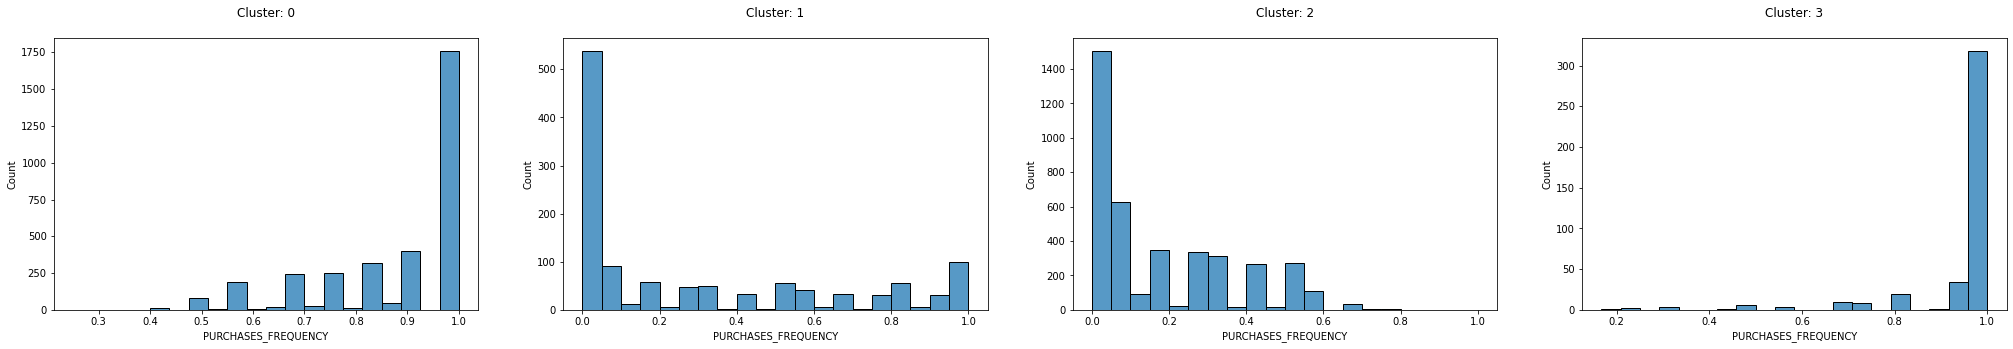

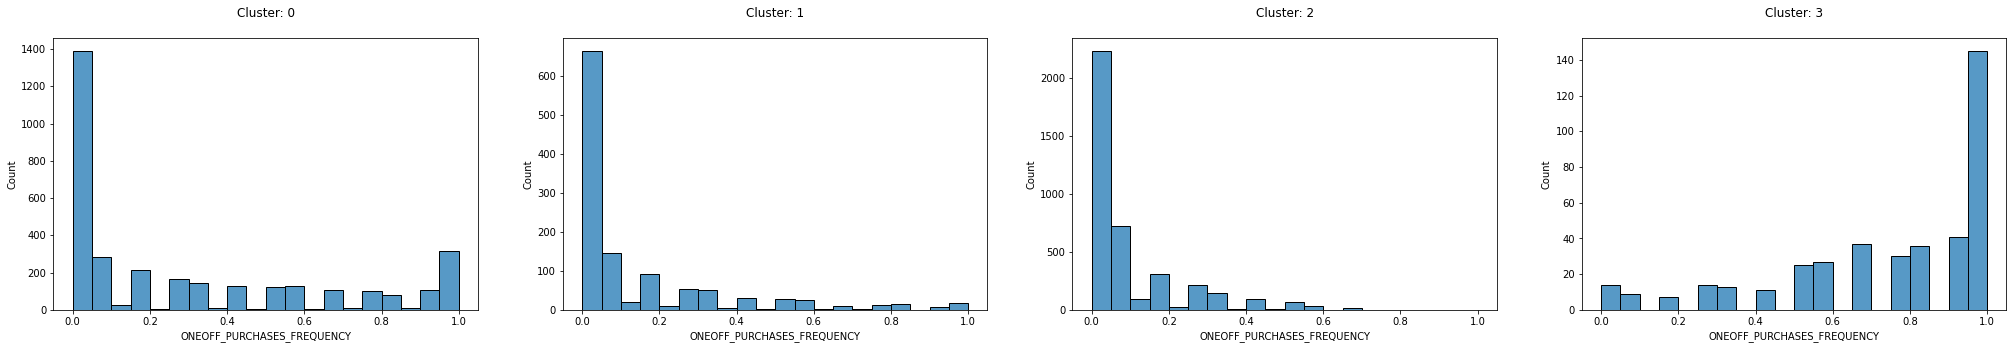

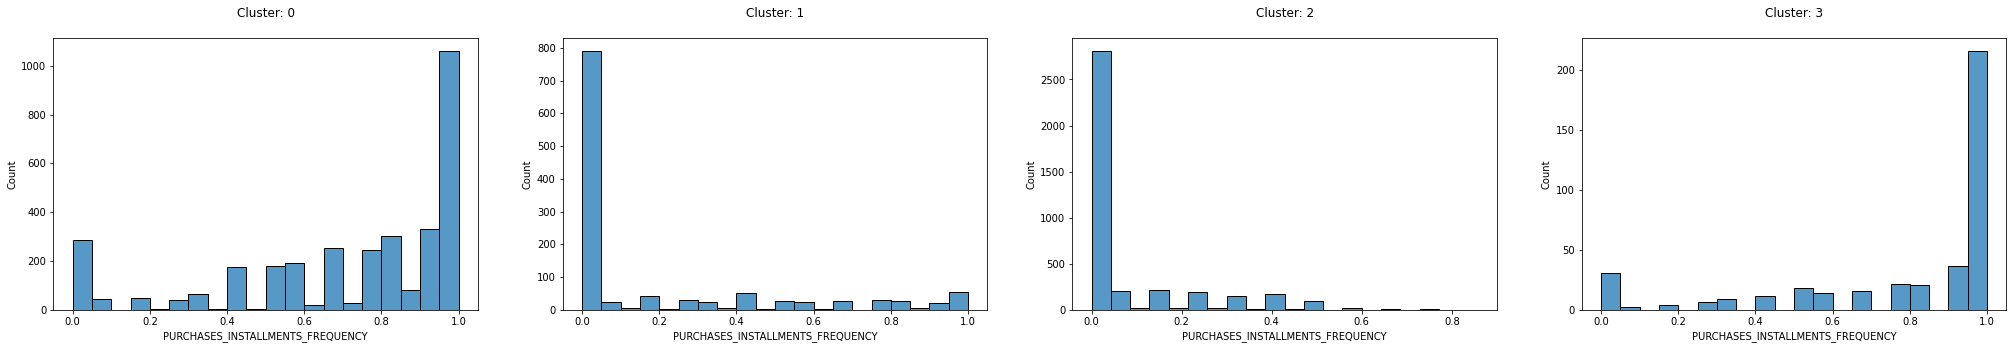

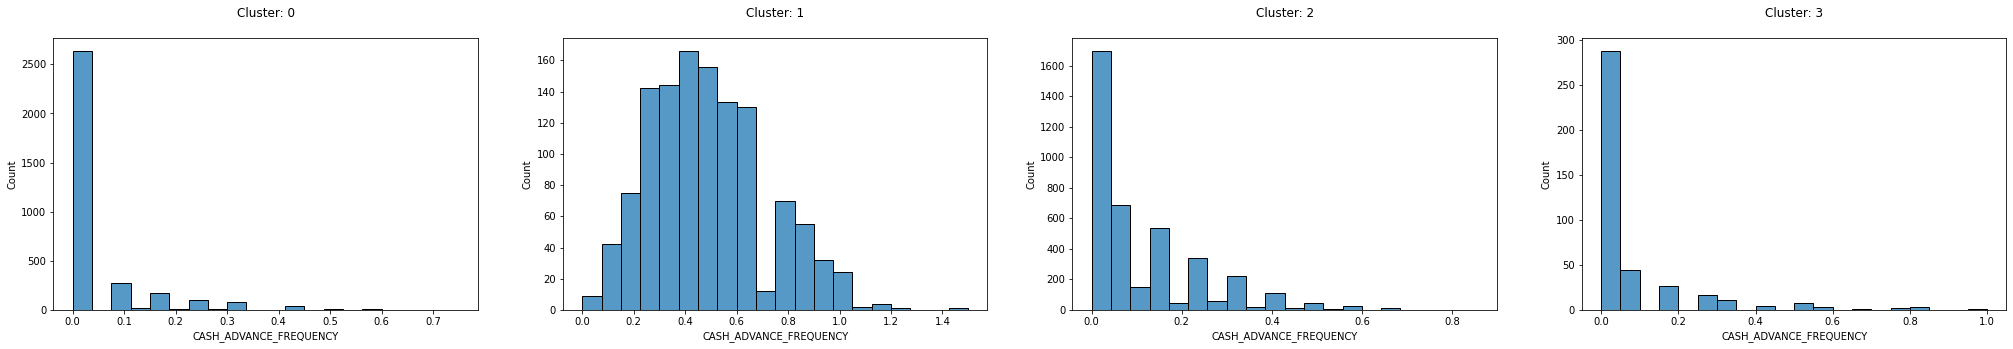

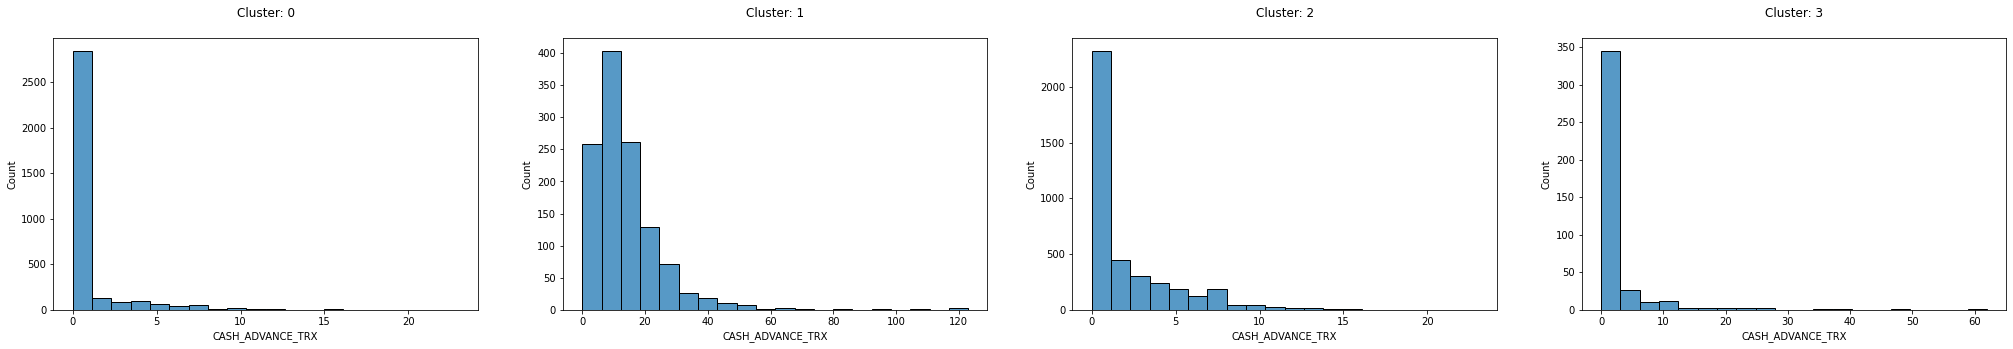

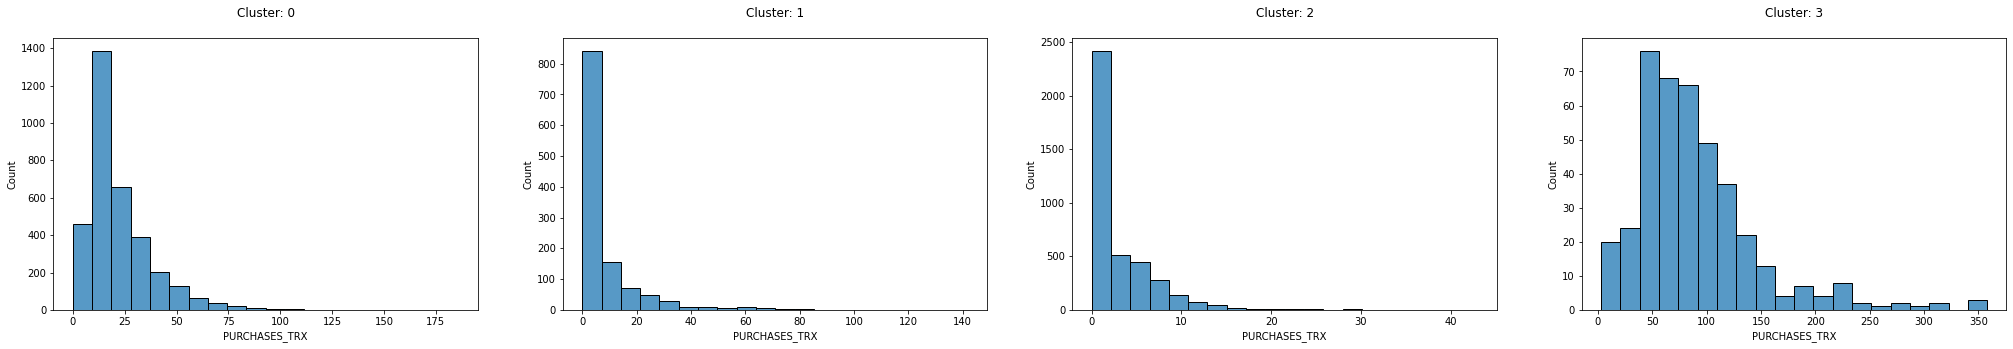

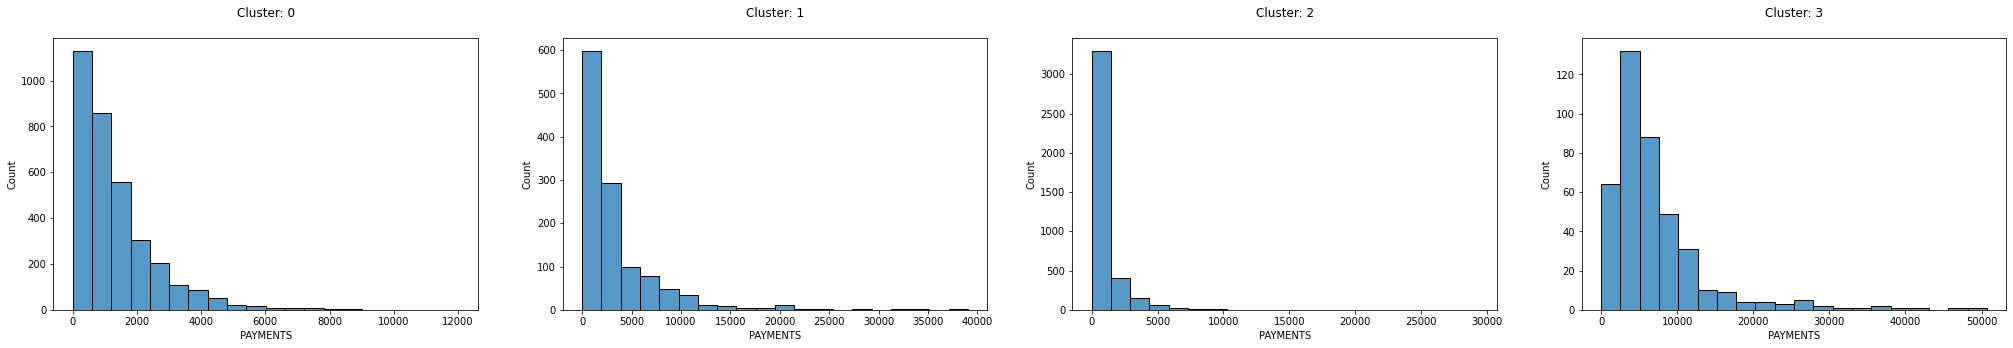

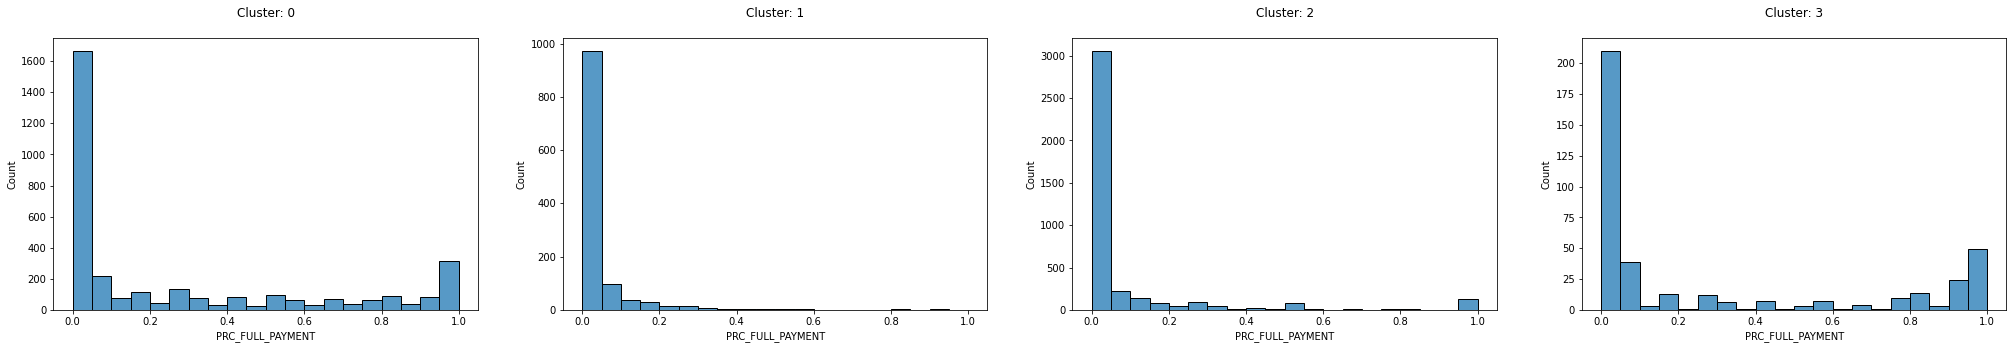

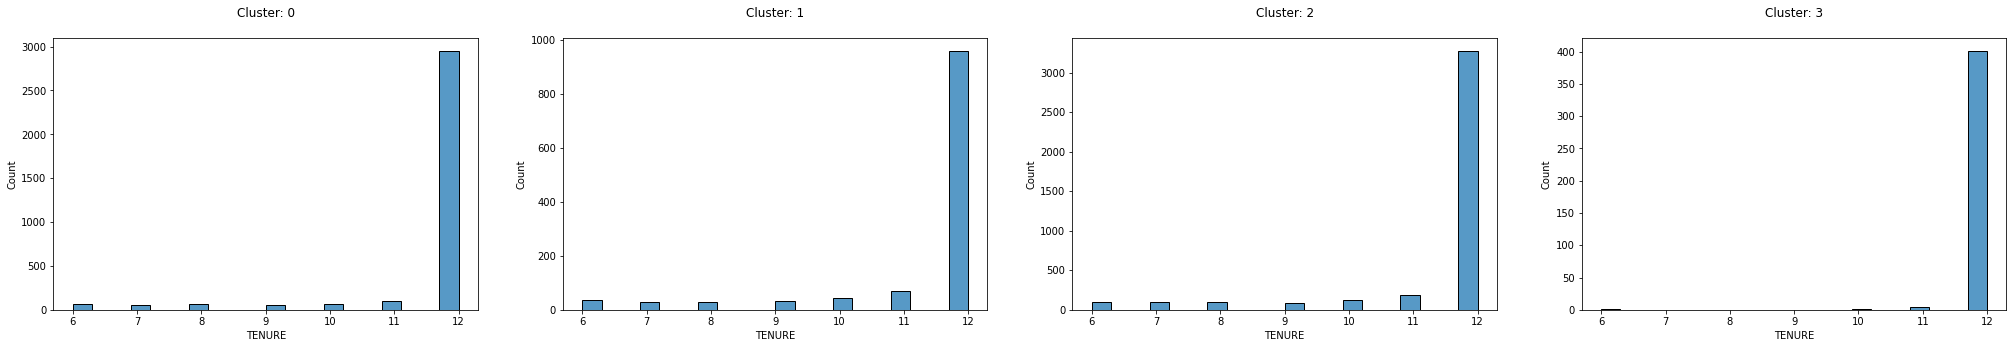

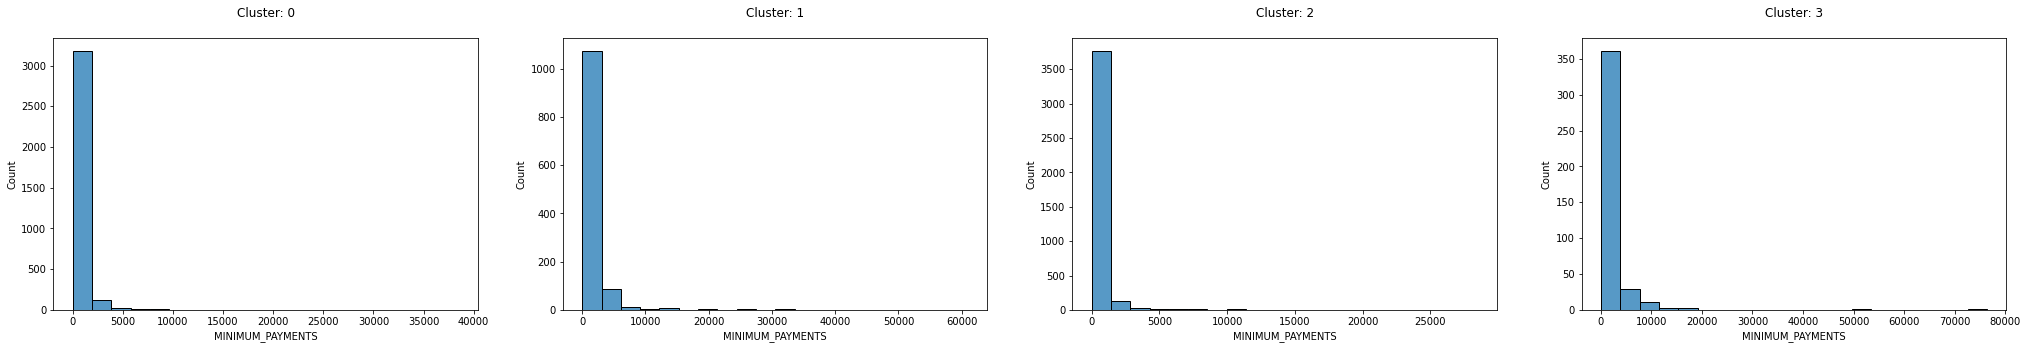

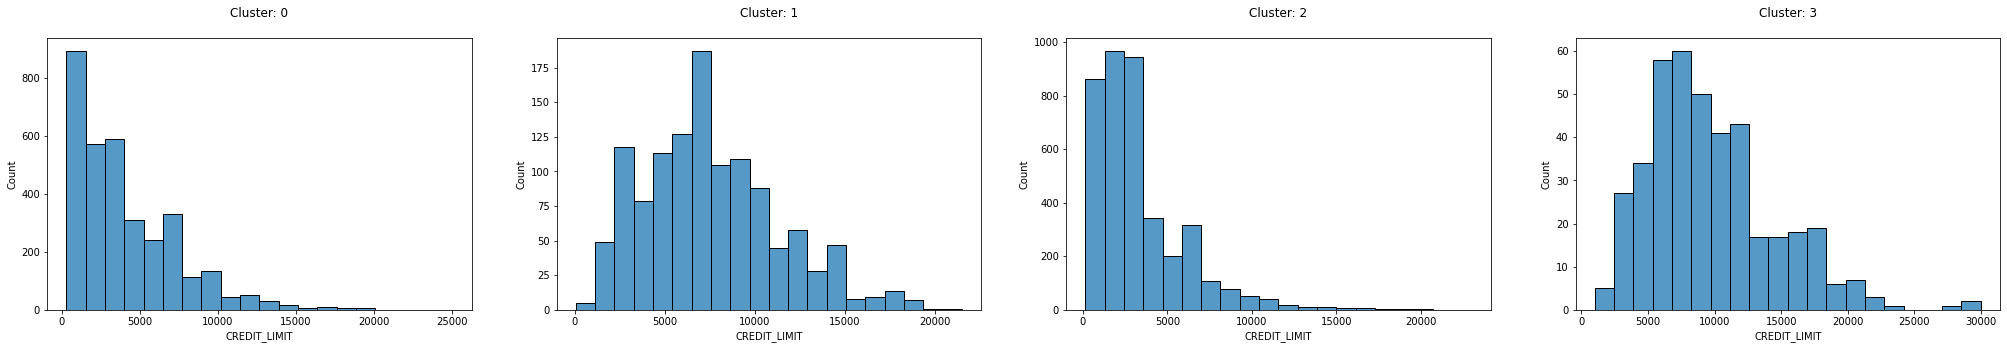

In [ ]:
for i in df_2.columns:
  fig, axs = plt.subplots(1,4, figsize=(35,5))
  for j in range(4):
    cluster = df_clusters[df_clusters["Cluster"]==j]
    sns.histplot(cluster[i],bins=20, ax=axs[j])
    axs[j].title.set_text(f"Cluster: {j}\n")

# APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

Obtenemos las componentes principales:

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222019, -1.07645048],
       [-1.13829645,  2.50647685],
       [ 0.96967967, -0.38352644],
       ...,
       [-0.92620261, -1.81078524],
       [-2.33654901, -0.65796346],
       [-0.55642231, -0.40046738]])

Creamos un dataframe con las dos componentes.


In [ ]:
pca_df = pd.DataFrame(principal_comp, columns=["pca1", "pca2"])
pca_df.head(10)

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138296,2.506477
2,0.969680,-0.383526
3,-0.873627,0.043168
4,-1.599434,-0.688581
5,0.251291,-0.780071
6,6.352926,-0.692531
7,0.277101,-1.290730
8,-0.441740,-0.461841
9,-0.562503,-0.366346


Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales.



In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis=1)

Podemos visualizar claramente los 4 grupos de clientes que poseemos.

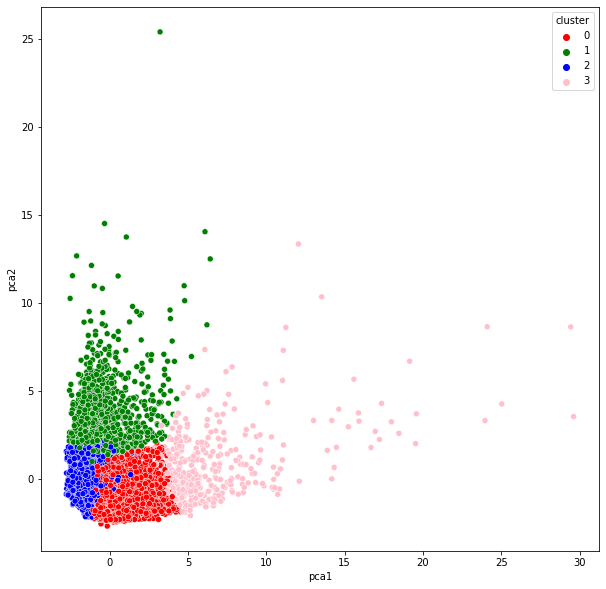

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y ="pca2",hue="cluster", palette=["red", "green", "blue", "pink"],data=pca_df)